# The mall customers dataset

You own a supermarket mall and through membership cards, you have som basic data about your customers like their ID, age, gender, annual income and spending score (which is a value you defined based on several information sources like customer behaviour and purchasing data).

You want to understand how your customers are segmented in order to posteriorly define a marketing strategy.

* Features variables
    * Age. Customer's age.
    * Gender. Customer's gender. 
    * Annual income. Customer's annual income.
    * Spending score. Customer's spending score.
    

#### Objective
Apply exploratory data analysis and cluster analysis to get information about customer segmentation in the supermarket mall.

#### Misssing
There are no missing values.

#### Table of contents
<ol>
    <li><a href="#preprocessing">Preprocessing</a></li>
    <li><a href="#exploratory_data_analysis">Exploratory data analysis</a></li>
        2.1. <a href="#univariate_analysis">Univariate analysis</a><br>
        2.2. <a href="#bivariate_analysis">Bivariate analysis</a><br>
    <li><a href="#clustering">Cluster analysis</a></li>
        3.1. <a href="#hierarchical">Hierarchical</a><br>
        3.2. <a href="#k_means">K-means</a><br>
        3.3. <a href="#gmm">GMM</a><br>
        3.4. <a href="#dbscan">DBSCAN</a><br>
</ol>

-----

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Data/mall_customers.csv")
df.drop("CustomerID", axis = "columns", inplace=True)
df.shape

(200, 4)

## 1 - Preprocessing

In [4]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Dado que los nombres de las variables son algo dificiles de trabajar con ellos, los pasamos a minuscula

In [10]:
#Existen multiples maneras de hacer esto, si queremos cambiar todas las columnas a la vez, puede ser mas eficiente
# cambiar la lista de nombres
#df.columns = ["gender", "age", "annual_income", "spending_score"]

# Tambien, si simplemente queremos cambiar un par de columnas en particular, podemos utilizar el metodo rename de Pandas
# En este caso, ambos darian el mismo resultado
df = df.rename(columns={"Gender": "gender", 
                        "Age": "age", 
                        "Annual Income (k$)": "annual_income", 
                        "Spending Score (1-100)": "spending_score"})
df.columns

Index(['gender', 'age', 'annual_income', 'spending_score'], dtype='object')

## 2 - Exploratory data analysis

In [12]:
df.drop(["gender"], axis="columns").describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### 2.1 - Univariate analysis

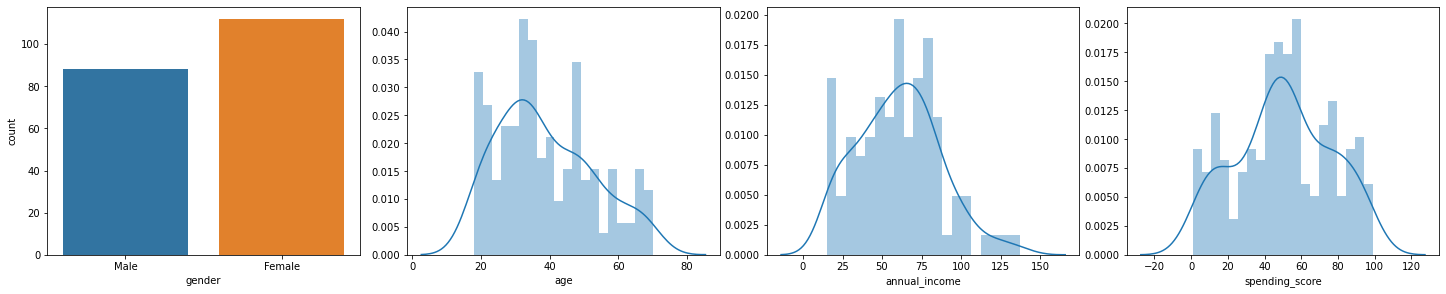

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 4))
axs = axs.flatten() # 

index = 0
for k,v in df.items(): 
    if k == "gender":
        sns.countplot(v, ax=axs[index])
    else:
        sns.distplot(v, bins=20, ax=axs[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 2.2 - Bivariate analysis

#### Spending vs Income

Text(0.5, 1.0, 'Spending vs Income')

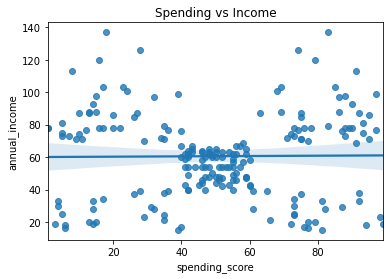

In [17]:
import seaborn as sns

sns.regplot(x=df["spending_score"], y=df["annual_income"]).set_title("Spending vs Income")

# A different kind of regplot that allows to group our instances by a categorical variable
#sns.lmplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue="Gender", data = df)

# We could have used a scatterplot, but it lacks the linear regression information
#sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue="Gender", data = df)

#### Spending vs Age

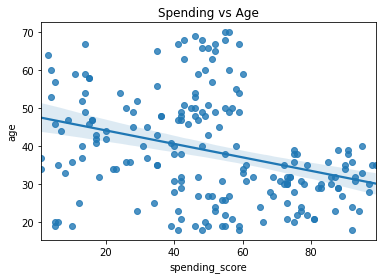

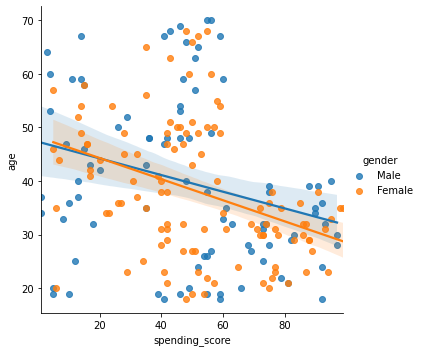

In [21]:
import seaborn as sns

#
sns.regplot(x=df["spending_score"], y=df["age"]).set_title("Spending vs Age")

# Podemos comprobar que tampoco se observa una relacion lineal fuerte entre clientes del mismo sexo, ya sean mujeres u hombres
sns.lmplot(x="spending_score", y="age", hue="gender", data = df)

## 3 - Cluster analysis